In [78]:
#collect dataset
!curl -o vibrio_cholerae_genome.txt 'http://bioinformaticsalgorithms.com/data/realdatasets/Replication/Vibrio_cholerae.txt'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1082k  100 1082k    0     0  2226k      0 --:--:-- --:--:-- --:--:-- 2231k


In [144]:
#https://stepik.org/lesson/2/step/1?unit=8231
#region of genome encoding ori is a few hundred nucleotides long -> need to find what makes a region special to approach finding ori in other bacteria
#length of txt file is 1108250
#THE GOAL: find the DnaA box where the DnaA protein binds to which is reponsible for initating replication in ori region
import math
# , [key for key, values in freq_mers.items() if values == val_max]

def most_frequent_kmer(sequence, k, rc=False):
    kmers = sequence
    k = int(k)
    possible_mers = []

    for i in range(0, len(kmers)-(k-1)):
        possible_mers.append(kmers[i:i+int(k)])
    
    freq_mers = {x:int(possible_mers.count(x)) for x in possible_mers}
    
    hard_values = list(freq_mers.keys())
    
    if rc == True:
        for mer in hard_values:
            if reverse_complement(mer) in hard_values:
                freq_mers[mer] += 1
                freq_mers[reverse_complement(mer)] -= 1
    
    max_val = list(set(freq_mers.values()))
    
    

    return freq_mers, [key for key, values in freq_mers.items() if values == max_val[-1]], max_val[-1]


class PatternMatch():
    def __init__ (self, sequence, pattern):
        self.sequence = sequence
        self.pattern = pattern
        first_idx = []
        self.first_idx = first_idx
    
        for i in range(0, len(self.sequence)):
            if self.sequence[i:i+len(pattern)] == self.pattern:
                first_idx.append(i)
    
    def indexes(self):
        return self.first_idx
    
    def print_index_values(self):
        sequence_recall = []
        for i in self.first_idx:
            sequence_recall.append(self.sequence[i:i+3])
        return sequence_recall


def reverse_complement(strand_p):
    comp_template = {'A': 'T', 'T':'A', 'C':'G', 'G':'C'}
    rstrand_p = ''
    strand_p = strand_p[::-1]
    
    for i in strand_p:
        rstrand_p += comp_template[str(i)]
    return rstrand_p

# def clumping_frequency(sequence, k, window_length, min_frequency):
#     all_mers, _ = most_frequent_kmer(sequence, k)
#     windowed_sequence = []
#     index_point = 0
#     for i in range(0, len(sequence)):
#         if i%window_length == 0:
#             index_point = i
#             windowed_sequence.append(sequence[index_point:index_point+window_length])
#             index_point += window_length
    
#     freq_table = {x:0 for x, item in enumerate(windowed_sequence)}

    
    
#     for idx, clump in enumerate(windowed_sequence):
#         mer_count = {mer: clump.count(mer) for mer in all_mers.keys()}
#         freq_table[idx] = mer_count
    
#     return freq_table, windowed_sequence
            
        

In [145]:
with open('dataset_2_13 (1).txt', 'r') as genome_example:
    txtinput = genome_example.read().splitlines()
    genome_eg = str(txtinput[0])
    genome_k = str(txtinput[1])

frequent_mers, val_max, max_val = most_frequent_kmer(genome_eg, genome_k)
print(frequent_mers)
print(val_max)
template = ''
for i in val_max:
    append = i+' '
    template += append
print(template)

{'TAATCACAGAGTG': 3, 'AATCACAGAGTGA': 3, 'ATCACAGAGTGAC': 3, 'TCACAGAGTGACG': 3, 'CACAGAGTGACGC': 3, 'ACAGAGTGACGCT': 3, 'CAGAGTGACGCTG': 1, 'AGAGTGACGCTGT': 1, 'GAGTGACGCTGTG': 1, 'AGTGACGCTGTGA': 2, 'GTGACGCTGTGAC': 3, 'TGACGCTGTGACG': 3, 'GACGCTGTGACGC': 3, 'ACGCTGTGACGCT': 3, 'CGCTGTGACGCTC': 1, 'GCTGTGACGCTCT': 1, 'CTGTGACGCTCTC': 1, 'TGTGACGCTCTCT': 1, 'GTGACGCTCTCTA': 6, 'TGACGCTCTCTAT': 6, 'GACGCTCTCTATG': 6, 'ACGCTCTCTATGT': 6, 'CGCTCTCTATGTT': 6, 'GCTCTCTATGTTG': 6, 'CTCTCTATGTTGC': 4, 'TCTCTATGTTGCT': 4, 'CTCTATGTTGCTG': 5, 'TCTATGTTGCTGA': 5, 'CTATGTTGCTGAC': 5, 'TATGTTGCTGACC': 5, 'ATGTTGCTGACCC': 5, 'TGTTGCTGACCCA': 5, 'GTTGCTGACCCAT': 3, 'TTGCTGACCCATA': 1, 'TGCTGACCCATAA': 1, 'GCTGACCCATAAT': 1, 'CTGACCCATAATC': 5, 'TGACCCATAATCA': 5, 'GACCCATAATCAC': 5, 'ACCCATAATCACA': 5, 'CCCATAATCACAG': 5, 'CCATAATCACAGA': 5, 'CATAATCACAGAC': 2, 'ATAATCACAGACT': 4, 'TAATCACAGACTG': 3, 'AATCACAGACTGA': 3, 'ATCACAGACTGAC': 3, 'TCACAGACTGACC': 3, 'CACAGACTGACCC': 3, 'ACAGACTGACCCA': 3,

In [146]:
# print(most_frequent_kmer('CGCCTAAATAGCCTCGCGGAGCCTTATGTCATACTCGTCCT', 3))
# print(pattern_match('ATGACTTCGCTGTTACGCGC', 'CGC'))

## EXAMPLE
indexes = PatternMatch('ATGACTTCGCTGTTACGCGC', 'CGC')
print(indexes.print_index_values())
print(indexes.indexes())


['CGC', 'CGC', 'CGC']
[7, 15, 17]


In [147]:
##https://stepik.org/lesson/2/step/6?discussion=3846236&thread=solutions&unit=8231

with open('dataset_2_6.txt', 'r') as genome_example:
    txtinput = genome_example.read().splitlines()
    genome_eg = str(txtinput[0])
    genome_dnaa = str(txtinput[1])

indexes = PatternMatch(genome_eg, genome_dnaa)
print(indexes.print_index_values())
print(indexes.indexes())
print(len(indexes.indexes()))


['TCC', 'TCC', 'TCC', 'TCC', 'TCC', 'TCC', 'TCC', 'TCC', 'TCC', 'TCC', 'TCC', 'TCC', 'TCC', 'TCC', 'TCC', 'TCC', 'TCC', 'TCC', 'TCC', 'TCC', 'TCC', 'TCC', 'TCC', 'TCC', 'TCC', 'TCC', 'TCC', 'TCC', 'TCC']
[26, 54, 71, 78, 127, 136, 151, 158, 176, 371, 378, 420, 449, 456, 499, 557, 583, 657, 730, 737, 786, 802, 809, 846, 870, 885, 892, 899, 910]
29


In [148]:
with open('dataset_3_2.txt', 'r') as genome_example:
    txtinput = genome_example.read().rstrip("\n")

reverse_complement(txtinput)

'TCATAGTAGGGCTATCCCCGAAGGTGCGTTAGAGTCCTCTATCGCATATTCTCTGAGGTAGCGATGATCCCAGCGTCTAATACTGCTCCAGCCCACCGGGGTAAGAGACTATGTTCACCCATTGGATCCCAACTTCTTTTGCGTGTGGATATATCCAGCCCGCCGGTGGTTGTTCTAAACTATGAAAGCATACTGTCCGTCCTCTTGCAACGGCCATACACTGCAGGATCGGGAGACAATCTTCTTTGTGGTTTATTACGCTGGACCCTTTGTCCTAAATTTTCTAGGGCCTGTAAGGGATAAGAGGCAGTCTGGGTAACCCTCACTAGGGCCTGCGCAAAACTCGTGATGGTCCTGGGGCAGAGACCTACTAAAAGACACCCCTGTCTTAACACTCTCGCTTGCTTCTGCACCGAACAGGCCTGGCCCATAGAAGAAACACACTTTATCGATCGACTAGGACTCGGACTTGGACACGTCTCCGTTACACAGAGTGCTGGTGTGCACTACGATGTGGGGTAGTATCGGGTCTGTCGTTCCACAGTGGCAACCAACATATATGGAGCAGGCTGGTGATGTGCCAACGACCAGTACAGAGAGCGGACTTATGGCTGATAGTGGTTAGGATAGACTACACGACCTATCGCTCGCGGTCTCTCGGCCCGATAAGAGCGACTTCGATGAGAACTTTACCGGCGGATCTTAGGCCGGACTACCGGATGGACTGCGCCCCGCGGTCTACTTACGGATTTTGCGGGAATTCCGTGTATGGTTATGATCAGACTTCAGTTGTTTGGCCATCGGGTAGTGAATTCGTAGCGAACGGAAGTTCCATAGACATACGCTGTAGGTCGCGTGCCTATGGATCTGTAAAGTTAGGTGTGTCACAAATATTTCAATAGGTGGCATAGGGATTCGTGTTACACGGGTTCACAACCATGCTGGGTACCGCCACAGTTCTAGTCGGCCGGCTAATAATAAACTCAATCTCAATACGCC

In [149]:
with open('dataset_3_5.txt', 'r') as genome_eg:
    txtinput = genome_eg.read().splitlines()
    genome_pattern = txtinput[0]
    genome_example = txtinput[1]

indices = PatternMatch(genome_example, genome_pattern).indexes()
template = ''

for i in indices:
    template += f'{i} '

print(template)

0 169 198 220 255 372 411 418 449 456 463 479 525 574 686 693 904 938 968 975 1065 1081 1129 1136 1156 1163 1170 1291 1358 1365 1401 1463 1483 1501 1537 1547 1554 1589 1681 1698 1725 1732 1739 1892 1931 1980 2019 2092 2127 2164 2191 2260 2301 2317 2332 2363 2370 2393 2400 2417 2450 2508 2515 2526 2533 2549 2657 2666 2710 2717 2724 2765 2784 2791 2809 2841 2848 2855 2893 2915 2953 2960 2994 3014 3068 3086 3093 3130 3190 3219 3251 3258 3319 3361 3376 3383 3399 3442 3449 3496 3596 3603 3636 3739 3746 3753 3768 3784 3802 3855 3890 3910 3938 3945 3960 3985 4036 4124 4131 4147 4163 4200 4348 4355 4393 4400 4435 4452 4504 4542 4639 4662 4717 4761 4776 4799 4806 4934 4967 4983 4999 5006 5013 5056 5103 5110 5117 5132 5151 5180 5247 5313 5383 5398 5481 5508 5596 5611 5667 5684 5701 5716 5744 5777 5818 5870 5877 5884 5926 5933 5978 6001 6008 6037 6052 6069 6153 6194 6218 6363 6370 6385 6462 6512 6528 6535 6552 6581 6608 6640 6647 6682 6755 6762 6769 6795 6877 6920 6968 7035 7050 7081 7088 7202 72

In [150]:
with open('exercise_vibrio_cholerae.txt', 'r') as genome_eg:
    txtinput = genome_eg.read()
    
#less pattern is 'ATGATCAAG', exercise is 'CTTGATCAT' despite being complementary  
indices = PatternMatch(txtinput, 'ATGATCAAG').indexes()
template = ''

for i in sorted(indices):
    template += f'{i} '

print(template)

116556 149355 151913 152013 152394 186189 194276 200076 224527 307692 479770 610980 653338 679985 768828 878903 985368 


In [151]:
def clumping_frequency(sequence, k, window_length, min_frequency):
    all_mers, _, _ = most_frequent_kmer(sequence, k)
    windowed_sequence = []
    index_point = 0
    for i in range(0, len(sequence)):
#         if i%window_length == 0:
        index_point = i
        if len(sequence[index_point:index_point+window_length]) != window_length:
            pass
        else:
            windowed_sequence.append(sequence[index_point:index_point+window_length])
            index_point += 1
#         index_point ++ window_length
    
    freq_table = {x:0 for x, item in enumerate(windowed_sequence)}
    final_sequences = set()
    
    
    for idx, clump in enumerate(windowed_sequence):
        mer_count = {mer:0 for mer in all_mers.keys()}
        for mer in all_mers.keys():
            freq = clump.count(mer)
            mer_count[mer] = freq
            
            if freq == min_frequency:
                final_sequences.add(mer)
            
        freq_table[idx] = mer_count
  
    #         mer_count = {mer: clump.count(mer) for mer in all_mers.keys()}

    return freq_table, windowed_sequence, final_sequences




In [152]:
with open('dataset_4_5.txt', 'r') as genome_example:
    txtinput = genome_example.read().splitlines()
    seq_inp = txtinput[0]
    params = txtinput[1].split(' ')
    k_length, L_length, t_times = params[0], params[1], params[2]

freq_table, windowed_sequence, final_sequences = clumping_frequency(seq_inp, int(k_length), int(L_length), int(t_times))

In [ ]:
##exercise for clumping
!curl -o exercise_e_coli.txt 'http://bioinformaticsalgorithms.com/data/realdatasets/Rearrangements/E_coli.txt'

In [ ]:
with open('exercise_e_coli.txt', 'r') as genome_example:
    txtinput = genome_example.read()
    
freq_table, windowed_sequence, final_sequences = clumping_frequency(txtinput, 9, 500, 3)
print(final_sequences)
print(len(freq_table))
print(len(windowed_sequence))

In [155]:
##Skew Function

import matplotlib.pyplot as plt
import datetime as dt

##THE CRAPPY FIRST ATTEMPT
def skew_value_check(sequence):
    template = [0 for _ in range(len(sequence)+1)]
    for idx in range(1, len(sequence)+1):
        if sequence[idx-1] == 'C':
            template[idx:idx+1] = [template[idx] - 1 for _ in range(2)]
        elif sequence[idx-1] == 'G':
            template[idx:idx+1] = [template[idx] + 1 for _ in range(2)]
        else:
            template[idx:idx+1] = [template[idx] for _ in range(2)]

            
    return template[:len(sequence)+1], [idx for idx, i in enumerate(template) if i == min(template)]


##THE OPTIMIZED SECOND ATTEMPT
def skew_genome(genome):
    skew = [0]
    current_min = 0
    min_idx = []
    
    for idx in range(len(genome)):
        if genome[idx] == 'C':
            skew.append(skew[idx]-1)
        elif genome[idx] == 'G':
            skew.append(skew[idx]+1)
        else:
            skew.append(skew[idx])
        
        if skew[idx] <= current_min:
            current_min = skew[idx]
            min_idx.append([current_min, idx])
        else:
            continue
    
    absolute_min = min(min_idx)[0]
    all_instances = [pos[1] for pos in min_idx if pos[0] == absolute_min]
    
    return skew, all_instances



[11, 24]
[0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, -1, 0, 0, 1, 1, 2, 3, 2, 1, 1, 1, 0, 0, -1, 0, 0, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 3, 4, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 7, 8, 8, 7, 6, 7, 7, 7]


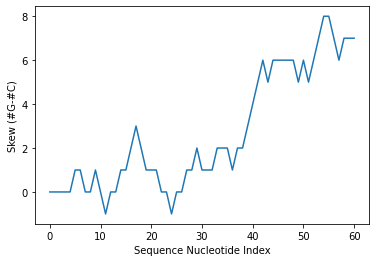

In [156]:
##THE CRAPPY FIRST ATTEMPT

plt.xlabel("Sequence Nucleotide Index")
plt.ylabel("Skew (#G-#C)")
data, minimum = skew_value_check('TAAAGACTGCCGAGAGGCCAACACGAGTGCTAGAACGAGGGGCGTAAACGCGGGTCCGAT')
print(minimum)
print(data)

plt.plot(data)

[11, 24]
[0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, -1, 0, 0, 1, 1, 2, 3, 2, 1, 1, 1, 0, 0, -1, 0, 0, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 3, 4, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 7, 8, 8, 7, 6, 7, 7, 7]


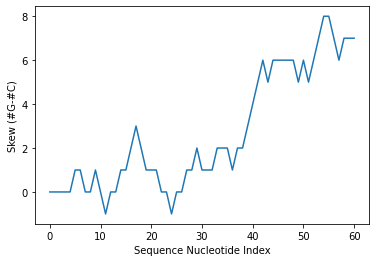

In [157]:
##THE OPTIMIZED SECOND ATTEMPT

plt.xlabel("Sequence Nucleotide Index")
plt.ylabel("Skew (#G-#C)")
data, minimum = skew_genome('TAAAGACTGCCGAGAGGCCAACACGAGTGCTAGAACGAGGGGCGTAAACGCGGGTCCGAT')
print(minimum)
print(data)

plt.plot(data)

In [ ]:
##THE CRAPPY FIRST ATTEMPT

print(dt.datetime.now())
with open('minimum_skew_dataset.txt', 'r') as linear_genome:
    txtinput = linear_genome.read().splitlines()
begin_time = dt.datetime.now()
print(begin_time)
data, minimum = skew_value_check(str(txtinput[1]))
end_time = dt.datetime.now()
print(end_time)
print(f"Time taken: {end_time-begin_time}")
plt.plot(data)
print(minimum)

2021-06-14 17:34:54.272081
2021-06-14 17:34:54.272828
2021-06-14 17:34:54.302351
Time taken: 0:00:00.029523
[89969, 89970, 89971, 90345, 90346]


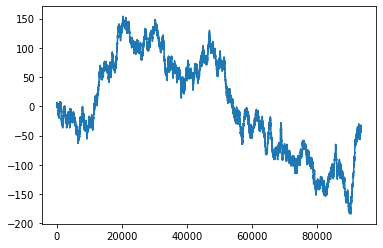

In [159]:
##THE OPTIMIZED SECOND ATTEMPT

print(dt.datetime.now())
with open('minimum_skew_dataset.txt', 'r') as linear_genome:
    txtinput = linear_genome.read().splitlines()
begin_time = dt.datetime.now()
print(begin_time)
data, minimum = skew_genome(str(txtinput[1]))
end_time = dt.datetime.now()
print(end_time)
print(f"Time taken: {end_time-begin_time}")
plt.plot(data)
print(minimum)

In [ ]:
##THE CRAPPY FIRST ATTEMPT

print(dt.datetime.now())
with open('dataset_7_10 (1).txt', 'r') as linear_genome:
    txtinput = linear_genome.read()
begin_time = dt.datetime.now()
print(begin_time)
data, minimum = skew_value_check(str(txtinput))
end_time = dt.datetime.now()
print(end_time)
print(f"Time taken: {end_time-begin_time}")
plt.plot(data)
print(minimum)

2021-06-14 17:34:59.958465
2021-06-14 17:34:59.960304
2021-06-14 17:34:59.986170
Time taken: 0:00:00.025866
[40, 56]


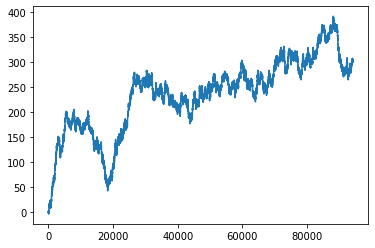

In [160]:
##THE OPTIMIZED SECOND ATTEMPT

print(dt.datetime.now())
with open('dataset_7_10 (2).txt', 'r') as linear_genome:
    txtinput = linear_genome.read()
begin_time = dt.datetime.now()
print(begin_time)
data, minimum = skew_genome(str(txtinput))
end_time = dt.datetime.now()
print(end_time)
print(f"Time taken: {end_time-begin_time}")
plt.plot(data)
print(minimum)

In [161]:
## Hamming Distance Problem -> number of mismatches between k-mers p and q -> H(p, q)
### A theory I have is that if possible, we could solve this problem using technically vector operations
import numpy as np

def hamming_distance(p, q):
    value_dict = {'C':1, 'G':2, 'A':3 ,'T':4}
    new_p = np.array([value_dict[k] for k in p])
    new_q = np.array([value_dict[k] for k in q])
    
    diff = np.subtract(new_p, new_q)
    return len(diff) - list(diff).count(0)

with open('dataset_9_3.txt', 'r') as linear_genome:
    txtinput = linear_genome.read().splitlines()
    
hamming_distance(txtinput[0], txtinput[1])

797

In [162]:
## Check number of approximate k-mers based on threshold for mismatches
### This can be an easier implementation because now we just have to check the hamming distance to determine whether we need to append the index or not - > Child's play 

def approx_matching(pattern, genome, d):
    all_idx = []
    for idx in range(0, len(genome)-(len(pattern)-1)):
        template_pattern = genome[idx:idx+len(pattern)]
#         print(len(template_pattern))
        if hamming_distance(pattern, template_pattern) <= d:
            all_idx.append(idx)
#             print(idx, end=' ')
        
    return all_idx

# with open('dataset_9_4 (3).txt', 'r') as linear_genome:
#     txtinput = linear_genome.read().splitlines()
    
# all_idx = approx_matching(txtinput[0], txtinput[1], int(txtinput[2]))
all_idx = approx_matching('AAAAA', 'AACAAGCTGATAAACATTTAAAGAG', 2)
print(all_idx)

[0, 1, 8, 9, 10, 11, 12, 17, 18, 19, 20]


In [163]:
with open('dataset_9_6.txt', 'r') as linear_genome:
    txtinput = linear_genome.read().splitlines()
    
all_idx = approx_matching(txtinput[0], txtinput[1], int(txtinput[2]))
print(len(all_idx))

15


In [164]:
# ##Combine Approximate Matches with Frequent Kmers into Frequent Approximate Kmers

# def most_frequent_approx(sequence_eg, k, d):
#     all_possible_patterns = [sequence_eg[idx:k+idx] for idx in range(0, len(sequence_eg)-(k-1))]
#     all_possible_patterns_comp = [reverse_complement(item) for item in all_possible_patterns]
    
#     all_unique_patterns = list(set(all_possible_patterns))
#     all_unique_patterns_comp = list(set(all_possible_patterns_comp))
#     all_possible_pattern_frequencies = {item: all_possible_patterns.count(item) for item in all_unique_patterns}
#     all_possible_pattern_frequencies_comp = {item: all_possible_patterns_comp.count(item) for item in all_unique_patterns}
    
    
#     approx_pattern_freq = {item:0 for item in all_possible_pattern_frequencies}
    
    
#     return all_possible_pattern_frequencies, all_possible_pattern_frequencies_comp
    

def most_frequent_approx(sequence_eg, k, d):
    patterns = [sequence_eg[idx:k+idx] for idx in range(0, len(sequence_eg)-(k-1))]    
    approx_patterns = {item:0 for item in set(patterns)}
    
    for pattern in approx_patterns.keys():
        approx_patterns[pattern] += (len(approx_matching(pattern, sequence_eg, d)) + len(approx_matching(reverse_complement(pattern), sequence_eg, d)))
    

    return approx_patterns, approx_patterns.values(), [key for key in approx_patterns.keys() if approx_patterns[key] == max(approx_patterns.values())]
    

approx_patterns, indices, freq_pattern = most_frequent_approx('ACGTTGCATGTCGCATGATGCATGAGAGCT', 4, 1)

print(max(approx_patterns.values()))


print(approx_patterns)
print(*freq_pattern, *[reverse_complement(i) for i in freq_pattern])

9
{'GAGC': 2, 'TCGC': 3, 'ATGC': 8, 'GAGA': 4, 'GCAT': 8, 'AGAG': 2, 'TTGC': 6, 'TGCA': 6, 'ATGA': 8, 'GTTG': 3, 'TGAT': 4, 'TGTC': 2, 'GATG': 8, 'CGTT': 1, 'TGAG': 4, 'ACGT': 4, 'CATG': 8, 'GTCG': 2, 'ATGT': 9, 'CGCA': 6, 'AGCT': 2}
ATGT ACAT


In [165]:
with open('dataset_9_10 (5).txt', 'r') as linear_genome:
    txtinput = linear_genome.read().splitlines()

params = txtinput[1].split(' ')
approx_patterns, indices, freq_pattern = most_frequent_approx(str(txtinput[0]), int(params[0]), int(params[1]))
print(max(approx_patterns.values()))


print(approx_patterns)
print(*freq_pattern, *[reverse_complement(i) for i in freq_pattern])

146
{'CCGGG': 126, 'GAGGG': 95, 'GAGAG': 61, 'GGGCC': 117, 'GCCGG': 116, 'CGGGG': 121, 'CCCGG': 126, 'CCCCC': 146, 'GGCCG': 125, 'CAGAG': 60, 'CCAGC': 88, 'CGGCG': 117, 'GGGAG': 101, 'AGGGC': 94, 'CAGCC': 84, 'GCCCG': 120, 'GCGGA': 77, 'CCAGA': 52, 'AGCCC': 91, 'CGGCC': 125, 'CCGGC': 116, 'CAGCG': 100, 'GGCGG': 132, 'AGAGG': 58, 'GCGGC': 119, 'AGGGA': 66, 'GAGCG': 69, 'AGAGA': 50, 'GGAGA': 63, 'CCGGA': 73, 'GGGCG': 132, 'GGGGC': 134, 'CCCCG': 121, 'GCCAG': 84, 'AGCGG': 87, 'GGGGA': 91, 'GGAGG': 94, 'GGCCC': 117, 'GAGCC': 90, 'GGCCA': 79, 'GCCCC': 134, 'AGCCA': 45, 'GGAGC': 83, 'AGAGC': 58, 'AGCCG': 76, 'GGGGG': 146, 'CGGAG': 67, 'AGGGG': 89}
CCCCC GGGGG GGGGG CCCCC


In [166]:
reverse_complement('ATGT')

'ACAT'

2021-06-14 17:35:07.791144
2021-06-14 17:35:13.832160
Time taken: 0:00:06.041016
[18824278, 18824279, 18824280, 18824281, 18824282, 18824288, 18824289, 18824290, 18824291, 18824292]


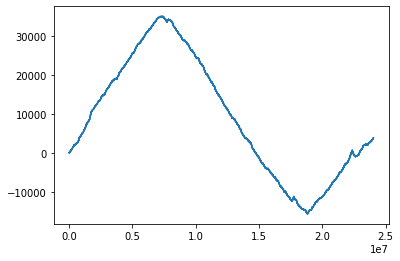

In [167]:
import itertools

#The final exercise for check
with open('salmonella_enterica.txt', 'r') as linear_genome:
    txtinput = linear_genome.read().splitlines()
    del txtinput[0]

txtinput = list(itertools.chain.from_iterable(txtinput))
begin_time = dt.datetime.now()
print(begin_time)
data, minimum = skew_genome(str(txtinput))
end_time = dt.datetime.now()
print(end_time)
print(f"Time taken: {end_time-begin_time}")
plt.plot(data)
print(minimum)
